# Public Restrooms Dataset Profile
## Comprehensive Data Quality Analysis for public_restrooms_20251016.csv

This notebook provides a detailed profile of the NYC public restrooms dataset including:
- Basic dataset information and structure
- Missing data analysis
- Categorical variable distributions
- Operational status analysis
- Geographic distribution
- Accessibility and amenities analysis
- Cross-tabulation insights

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import geopandas as gpd

warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Setup complete")

✓ Setup complete


## 1. Load Data

In [55]:
# Load the dataset
data_path = "../data/ext_data/data/public_restrooms_20251016.csv"
df = pd.read_csv(data_path)

print(f"✓ Dataset loaded successfully")
print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

✓ Dataset loaded successfully
  Shape: 1,066 rows × 14 columns

First few rows:


,Facility Name,Location Type,Operator,Status,Open,Hours of Operation,Accessibility,Restroom Type,Changing Stations,Additional Notes,Website,Latitude,Longitude,Location
0,Battery Park Zone 1,Park,NYC Parks,Not Operational,NaN,NaN,NaN,NaN,Yes,NaN,NaN,40.704410,-74.015900,POINT (-74.0159 40.70441)
1,Carl Schurz Main Lawn,Park,NYC Parks,Not Operational,NaN,NaN,Partially Accessible,Multi-Stall W/M Restrooms,Yes,NaN,NaN,40.773580,-73.945000,POINT (-73.945 40.77358)
2,Tappen Park,Park,NYC Parks,Not Operational,NaN,NaN,NaN,NaN,"""N/A, restrooms closed""",NaN,NaN,40.626610,-74.077800,POINT (-74.0778 40.62661)
3,Refinery Building,Park,Domino Park,Operational,Year Round,6am-11pm,NaN,NaN,NaN,NaN,NaN,40.714424,-73.967306,POINT (-73.967306 40.714424)
4,"Gravesend Library, BPL",Library,BPL,Closed for Construction,Year Round,NaN,Fully Accessible,Single-Stall All Gender Restroom(s),Yes,NaN,https://www.bklynlibrary.org/locations/gravesend,40.590553,-73.971810,POINT (-73.97181 40.590553)


## 2. Basic Information

In [56]:
# Column information
print("Column Information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Facility Name       1066 non-null   object 
 1   Location Type       1066 non-null   object 
 2   Operator            1066 non-null   object 
 3   Status              1066 non-null   object 
 4   Open                993 non-null    object 
 5   Hours of Operation  973 non-null    object 
 6   Accessibility       891 non-null    object 
 7   Restroom Type       922 non-null    object 
 8   Changing Stations   979 non-null    object 
 9   Additional Notes    71 non-null     object 
 10  Website             228 non-null    object 
 11  Latitude            1066 non-null   float64
 12  Longitude           1066 non-null   float64
 13  Location            1066 non-null   object 
dtypes: float64(2), object(12)
memory usage: 116.7+ KB

Column Names:
 1. Facility Name
 

## 3. Missing Data Analysis

Missing Data Summary:
            Column  Missing_Count  Missing_Percent  Non_Missing
  Additional Notes            995            93.34           71
           Website            838            78.61          228
     Accessibility            175            16.42          891
     Restroom Type            144            13.51          922
Hours of Operation             93             8.72          973
 Changing Stations             87             8.16          979
              Open             73             6.85          993
     Facility Name              0             0.00         1066
     Location Type              0             0.00         1066
          Operator              0             0.00         1066
            Status              0             0.00         1066
          Latitude              0             0.00         1066
         Longitude              0             0.00         1066
          Location              0             0.00         1066


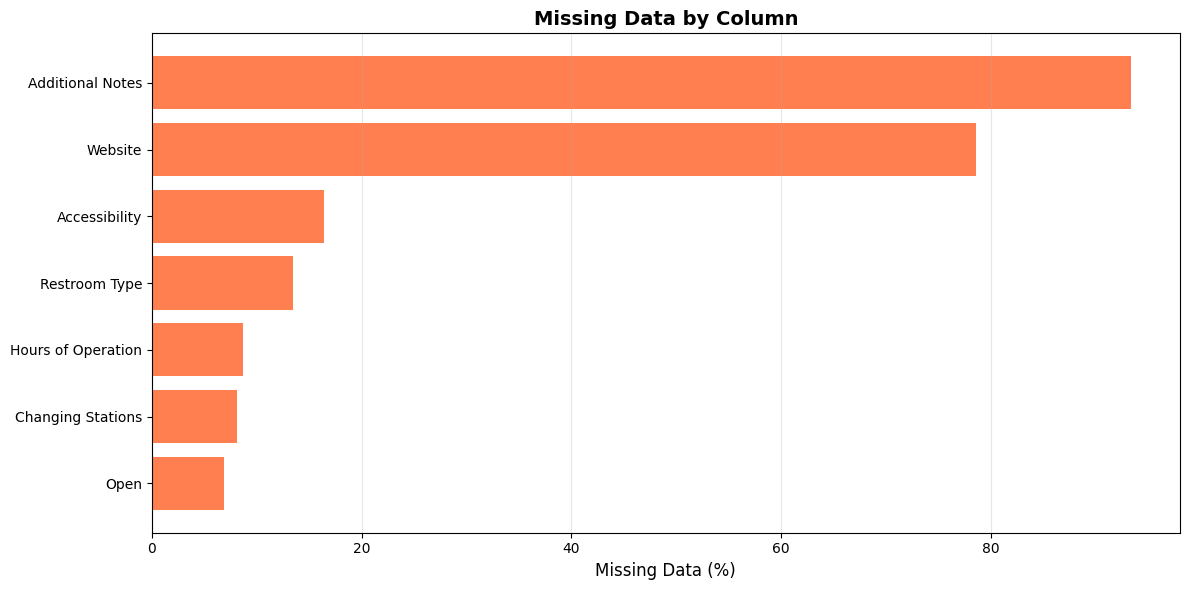

In [57]:
# Missing data summary
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2),
    'Non_Missing': len(df) - df.isnull().sum()
}).sort_values('Missing_Percent', ascending=False)

print("Missing Data Summary:")
print("="*80)
print(missing_data.to_string(index=False))

# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 6))
missing_data_sorted = missing_data[missing_data['Missing_Percent'] > 0].sort_values('Missing_Percent')
if not missing_data_sorted.empty:
    ax.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percent'], color='coral')
    ax.set_xlabel('Missing Data (%)', fontsize=12)
    ax.set_title('Missing Data by Column', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing data found in any column!")

## 4. Categorical Variables Analysis

In [58]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove coordinate-related columns for categorical analysis
exclude_cols = ['Location', 'Website', 'Additional Notes']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

print(f"Found {len(categorical_cols)} categorical columns for analysis\n")

# Create summary table
cat_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Values': [df[col].nunique() for col in categorical_cols],
    'Missing_Count': [df[col].isnull().sum() for col in categorical_cols],
    'Missing_Pct': [(df[col].isnull().sum() / len(df) * 100).round(2) for col in categorical_cols]
})

print("Categorical Columns Summary:")
print(cat_summary.to_string(index=False))

Found 9 categorical columns for analysis

Categorical Columns Summary:
            Column  Unique_Values  Missing_Count  Missing_Pct
     Facility Name           1040              0         0.00
     Location Type              5              0         0.00
          Operator             33              0         0.00
            Status              4              0         0.00
              Open              3             73         6.85
Hours of Operation            145             93         8.72
     Accessibility              4            175        16.42
     Restroom Type              5            144        13.51
 Changing Stations              7             87         8.16


In [59]:
# Detailed analysis of each categorical column
for col in categorical_cols:
    print("\n" + "="*80)
    print(f"Column: {col}")
    print("="*80)
    value_counts = df[col].value_counts(dropna=False)
    print(f"Unique values: {df[col].nunique()}")
    print(f"Missing values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
    print(f"\nValue distribution:")
    print(value_counts.head(15))


Column: Facility Name
Unique values: 1040
Missing values: 0 (0.0%)

Value distribution:
Facility Name
Heckscher Playground           3
Mill Pond Indoor Tennis        2
Sunken Meadow                  2
Playground                     2
Captain Mario Fajardo Park     2
Playground For All Children    2
The High Line Zone 1           2
Bloomingdale Playground        2
Midland Playground             2
Columbus Park                  2
St Nicholas                    2
Nautilus Playground            2
Midland Beach Zone 4           2
Grand Central Parkway Gas      2
Bowne Playground               2
Name: count, dtype: int64

Column: Location Type
Unique values: 5
Missing values: 0 (0.0%)

Value distribution:
Location Type
Park                            824
Library                         216
Privately Owned Public Space     14
Public Plaza                      7
Transit                           5
Name: count, dtype: int64

Column: Operator
Unique values: 33
Missing values: 0 (0.0%)

Value di

## 5. Operational Status Analysis

Restroom Status Distribution:
                         Count  Percentage
Status                                    
Operational                975       91.46
Not Operational             73        6.85
Closed for Construction     17        1.59
Closed                       1        0.09

Key Insight: 91.46% of restrooms are operational


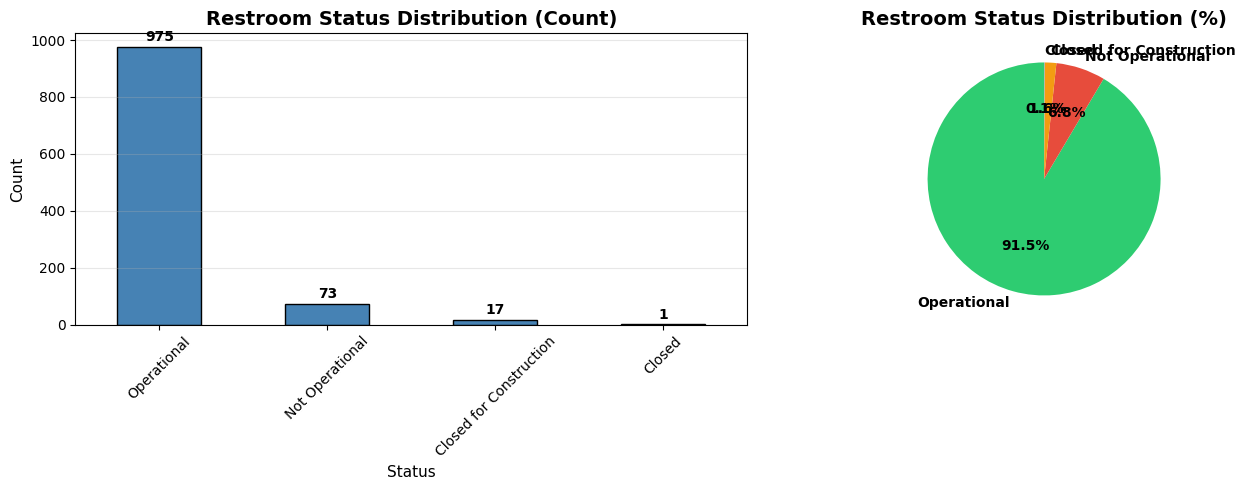

In [60]:
# Status distribution
if 'Status' in df.columns:
    status_counts = df['Status'].value_counts()
    status_pct = (status_counts / len(df) * 100).round(2)
    
    status_summary = pd.DataFrame({
        'Count': status_counts,
        'Percentage': status_pct
    })
    
    print("Restroom Status Distribution:")
    print("="*80)
    print(status_summary)
    
    operational_pct = status_pct.get('Operational', 0)
    print(f"\nKey Insight: {operational_pct}% of restrooms are operational")
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    status_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
    ax1.set_title('Restroom Status Distribution (Count)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Count', fontsize=11)
    ax1.set_xlabel('Status', fontsize=11)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    for i, v in enumerate(status_counts):
        ax1.text(i, v + max(status_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    colors = ['#2ecc71', '#e74c3c', '#f39c12', '#95a5a6']
    status_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                       colors=colors[:len(status_counts)], startangle=90,
                       textprops={'fontsize': 10, 'fontweight': 'bold'})
    ax2.set_title('Restroom Status Distribution (%)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print("Status column not found")

## 6. Location Type Analysis

Location Type Distribution:
                              Count  Percentage
Location Type                                  
Park                            824       77.30
Library                         216       20.26
Privately Owned Public Space     14        1.31
Public Plaza                      7        0.66
Transit                           5        0.47


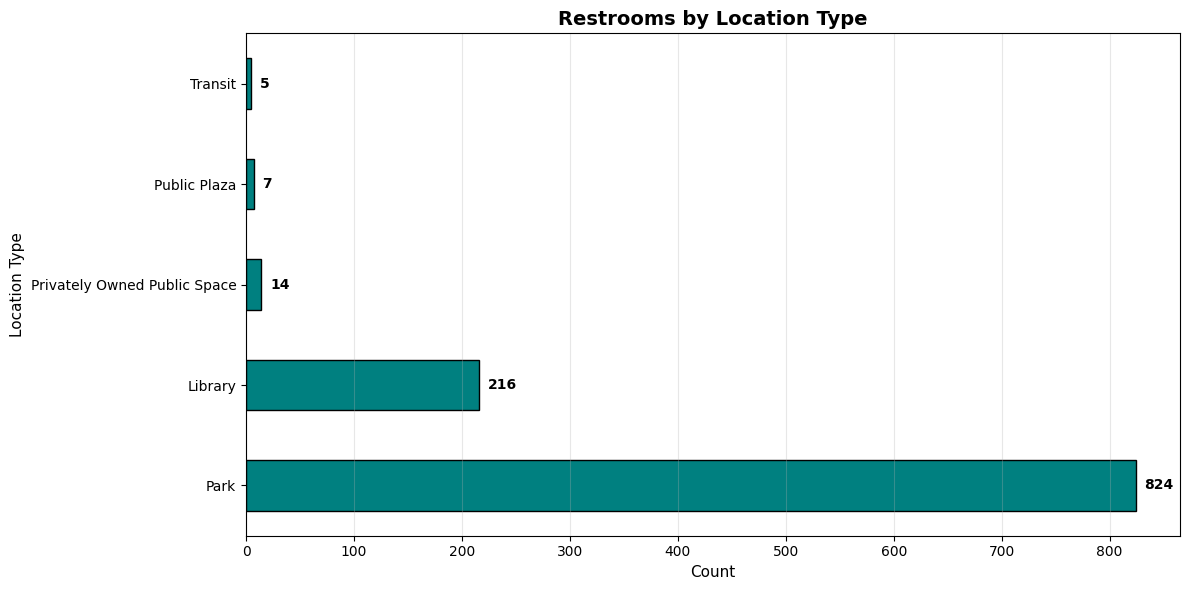

In [61]:
# Location Type distribution
if 'Location Type' in df.columns:
    location_counts = df['Location Type'].value_counts()
    location_pct = (location_counts / len(df) * 100).round(2)
    
    location_summary = pd.DataFrame({
        'Count': location_counts,
        'Percentage': location_pct
    })
    
    print("Location Type Distribution:")
    print("="*80)
    print(location_summary)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    location_counts.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
    ax.set_title('Restrooms by Location Type', fontsize=14, fontweight='bold')
    ax.set_xlabel('Count', fontsize=11)
    ax.set_ylabel('Location Type', fontsize=11)
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(location_counts):
        ax.text(v + max(location_counts)*0.01, i, str(v), va='center', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Location Type column not found")

## 7. Operator Analysis

Total unique operators: 33

Top 20 Operators:
 1. NYC Parks                                :  728 ( 68.3%)
 2. NYPL                                     :   91 (  8.5%)
 3. NYC Parks Concessionaire                 :   71 (  6.7%)
 4. QPL                                      :   63 (  5.9%)
 5. BPL                                      :   62 (  5.8%)
 6. Hudson River Park                        :   11 (  1.0%)
 7. NYC DOT/JCDecaux                         :    6 (  0.6%)
 8. Brooklyn Bridge Park                     :    4 (  0.4%)
 9. LIRR                                     :    3 (  0.3%)
10. Central Park Conservancy                 :    2 (  0.2%)
11. 34th Street Partnership                  :    2 (  0.2%)
12. Battery Park City Authority              :    2 (  0.2%)
13. 550 Madison Property Management          :    1 (  0.1%)
14. Brown Harris Stevens                     :    1 (  0.1%)
15. Private developer                        :    1 (  0.1%)
16. George Comfort and Sons, Inc.      

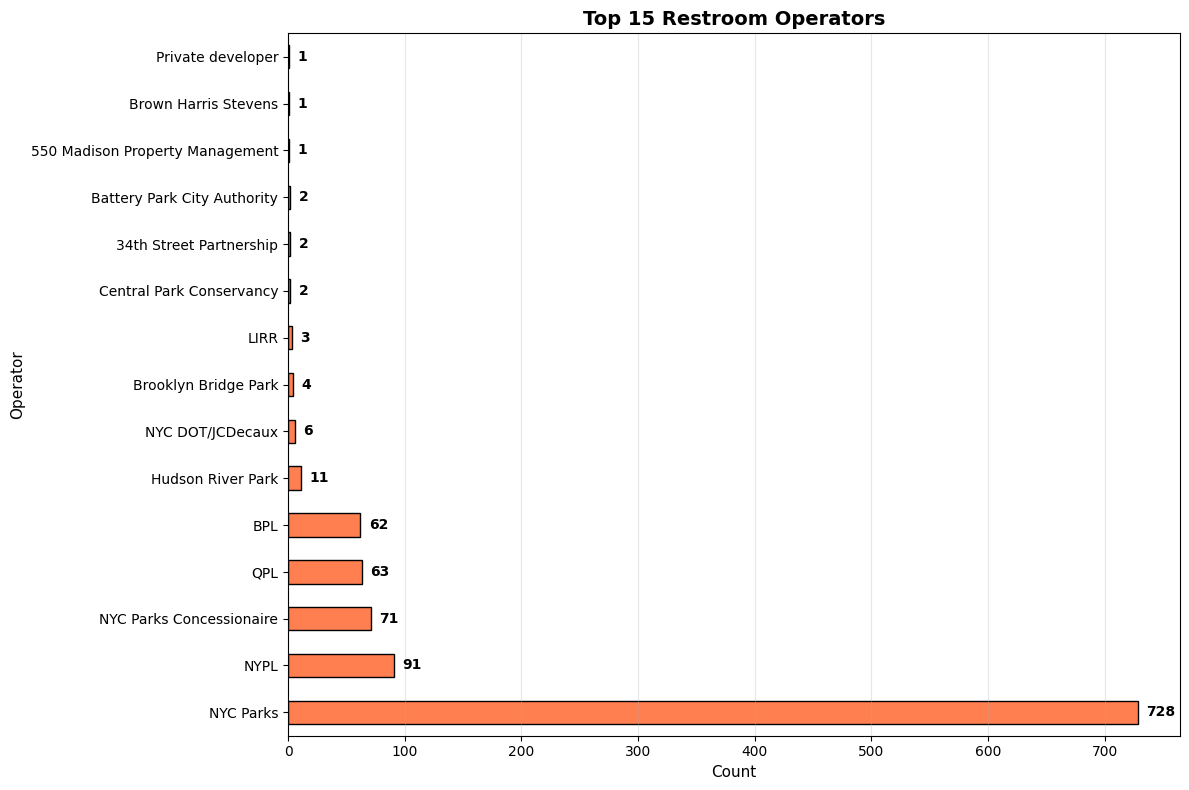

In [62]:
# Operator distribution
if 'Operator' in df.columns:
    operator_counts = df['Operator'].value_counts()
    
    print(f"Total unique operators: {df['Operator'].nunique()}")
    print(f"\nTop 20 Operators:")
    print("="*80)
    top_operators = operator_counts.head(20)
    for i, (operator, count) in enumerate(top_operators.items(), 1):
        pct = (count / len(df) * 100)
        print(f"{i:2d}. {operator:40s} : {count:4d} ({pct:5.1f}%)")
    
    # Visualize top 15
    fig, ax = plt.subplots(figsize=(12, 8))
    operator_counts.head(15).plot(kind='barh', ax=ax, color='coral', edgecolor='black')
    ax.set_title('Top 15 Restroom Operators', fontsize=14, fontweight='bold')
    ax.set_xlabel('Count', fontsize=11)
    ax.set_ylabel('Operator', fontsize=11)
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(operator_counts.head(15)):
        ax.text(v + max(operator_counts.head(15))*0.01, i, str(v), va='center', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Operator column not found")

## 8. Accessibility Analysis

Accessibility Distribution:
                       Count  Percentage
Accessibility                           
Fully Accessible         619       58.07
Not Accessible           218       20.45
NaN                      175       16.42
Partially Accessible      53        4.97
Limited Accessibility      1        0.09

Key Insight: 75.4% of restrooms with accessibility info are accessible


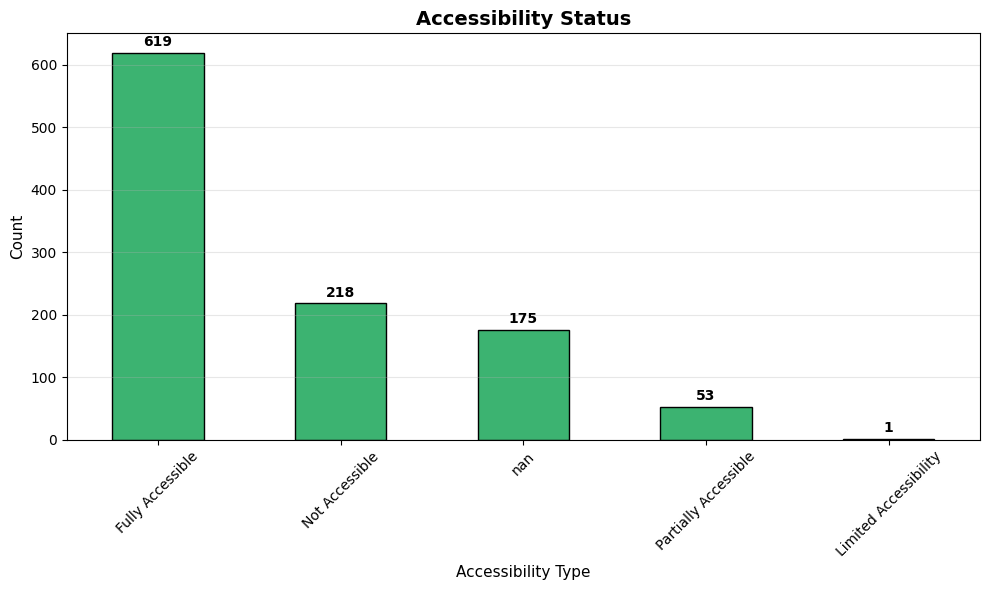

In [63]:
# Accessibility distribution
if 'Accessibility' in df.columns:
    accessibility_counts = df['Accessibility'].value_counts(dropna=False)
    accessibility_pct = (accessibility_counts / len(df) * 100).round(2)
    
    accessibility_summary = pd.DataFrame({
        'Count': accessibility_counts,
        'Percentage': accessibility_pct
    })
    
    print("Accessibility Distribution:")
    print("="*80)
    print(accessibility_summary)
    
    # Calculate accessible percentage (excluding NaN)
    accessible_count = accessibility_counts.get('Fully Accessible', 0) + accessibility_counts.get('Partially Accessible', 0)
    total_with_info = len(df) - df['Accessibility'].isnull().sum()
    if total_with_info > 0:
        accessible_pct_of_known = (accessible_count / total_with_info * 100).round(1)
        print(f"\nKey Insight: {accessible_pct_of_known}% of restrooms with accessibility info are accessible")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    accessibility_counts.plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
    ax.set_title('Accessibility Status', fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=11)
    ax.set_xlabel('Accessibility Type', fontsize=11)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    for i, v in enumerate(accessibility_counts):
        ax.text(i, v + max(accessibility_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Accessibility column not found")

## 9. Restroom Type Analysis

Restroom Type Distribution:
                                                  Count  Percentage
Restroom Type                                                      
Multi-Stall W/M Restrooms                           628       58.91
Single-Stall All Gender Restroom(s)                 163       15.29
NaN                                                 144       13.51
Both Single-Stall All Gender and Multi-Stall W/M    124       11.63
Multi-Stall All Gender Restrooms                      4        0.38
Single -Stall All Gender Restroom(s)                  3        0.28


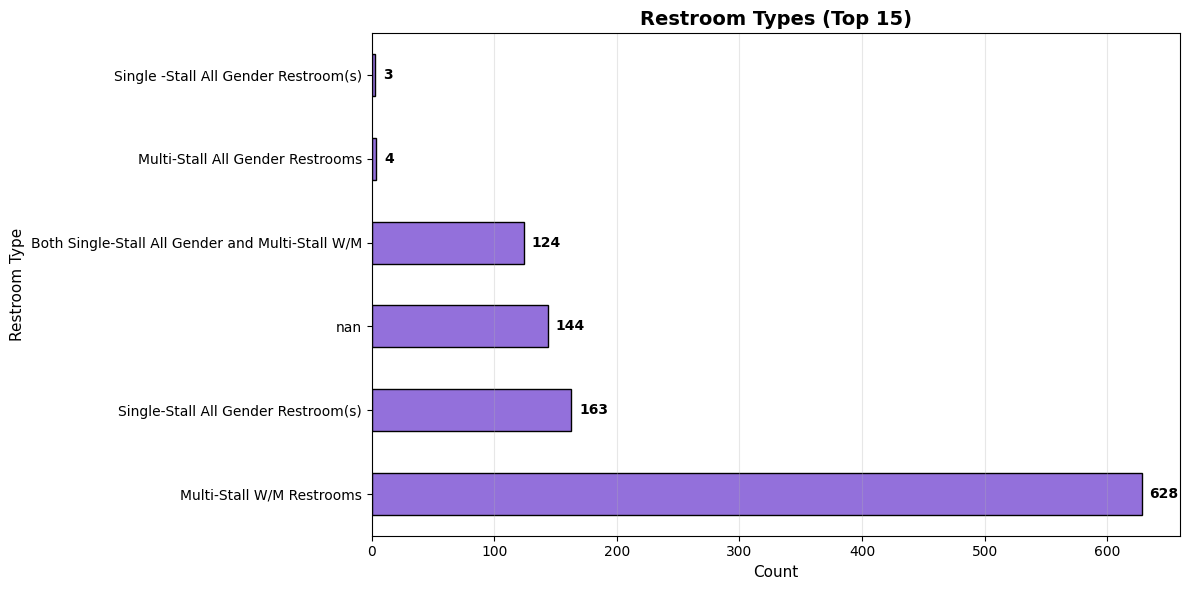

In [64]:
# Restroom Type distribution
if 'Restroom Type' in df.columns:
    restroom_type_counts = df['Restroom Type'].value_counts(dropna=False)
    restroom_type_pct = (restroom_type_counts / len(df) * 100).round(2)
    
    restroom_type_summary = pd.DataFrame({
        'Count': restroom_type_counts,
        'Percentage': restroom_type_pct
    })
    
    print("Restroom Type Distribution:")
    print("="*80)
    print(restroom_type_summary)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    restroom_type_counts.head(15).plot(kind='barh', ax=ax, color='mediumpurple', edgecolor='black')
    ax.set_title('Restroom Types (Top 15)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Count', fontsize=11)
    ax.set_ylabel('Restroom Type', fontsize=11)
    ax.grid(axis='x', alpha=0.3)
    for i, v in enumerate(restroom_type_counts.head(15)):
        ax.text(v + max(restroom_type_counts.head(15))*0.01, i, str(v), va='center', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Restroom Type column not found")

## 10. Changing Stations Availability

Changing Stations Availability:
                                                 Count  Percentage
Changing Stations                                                 
Yes                                                659       61.82
No                                                 174       16.32
NaN                                                 87        8.16
"Yes, in women's restroom only"                     83        7.79
"Yes, in men's restroom only"                       27        2.53
"Yes, in single-stall all gender restroom only"     26        2.44
"N/A, restrooms closed"                              8        0.75
N/A - closed for capital                             2        0.19

Key Insight: 61.82% of restrooms have changing stations


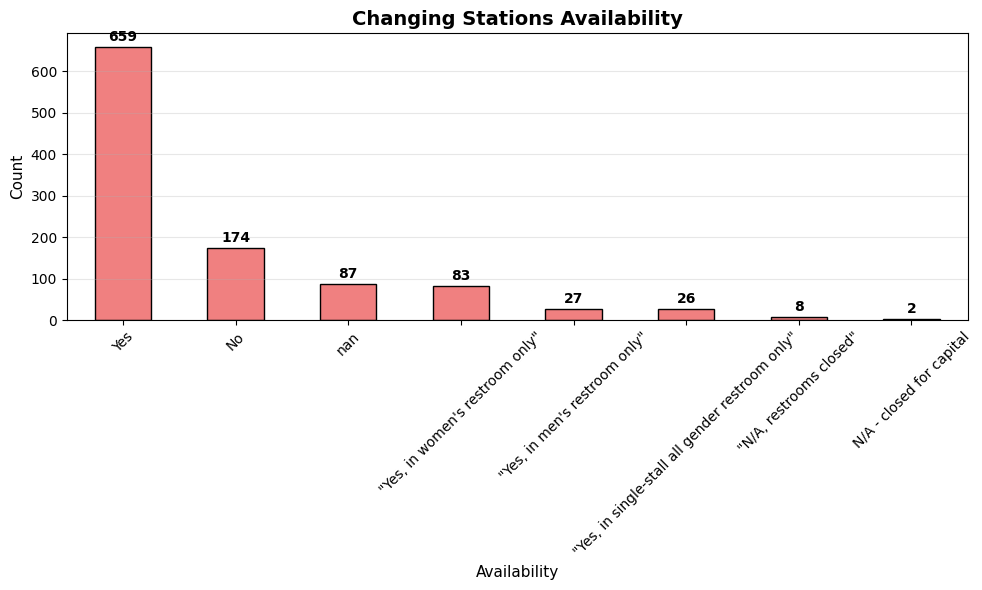

In [65]:
# Changing Stations distribution
if 'Changing Stations' in df.columns:
    changing_stations_counts = df['Changing Stations'].value_counts(dropna=False)
    changing_stations_pct = (changing_stations_counts / len(df) * 100).round(2)
    
    changing_stations_summary = pd.DataFrame({
        'Count': changing_stations_counts,
        'Percentage': changing_stations_pct
    })
    
    print("Changing Stations Availability:")
    print("="*80)
    print(changing_stations_summary)
    
    yes_pct = changing_stations_pct.get('Yes', 0)
    print(f"\nKey Insight: {yes_pct}% of restrooms have changing stations")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(10, 6))
    changing_stations_counts.plot(kind='bar', ax=ax, color='lightcoral', edgecolor='black')
    ax.set_title('Changing Stations Availability', fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=11)
    ax.set_xlabel('Availability', fontsize=11)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    for i, v in enumerate(changing_stations_counts):
        ax.text(i, v + max(changing_stations_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Changing Stations column not found")

## 11. Geographic Distribution

Geographic Coordinates Summary:

Latitude:
count    1066.000000
mean       40.728353
std         0.087783
min        40.502280
25%        40.669375
50%        40.729287
75%        40.794215
max        40.903731
Name: Latitude, dtype: float64

Longitude:
count    1066.000000
mean      -73.922067
std         0.091844
min       -74.251700
25%       -73.976097
50%       -73.927250
75%       -73.863131
max       -73.709600
Name: Longitude, dtype: float64

Restrooms with valid coordinates: 1,066 (100.0%)


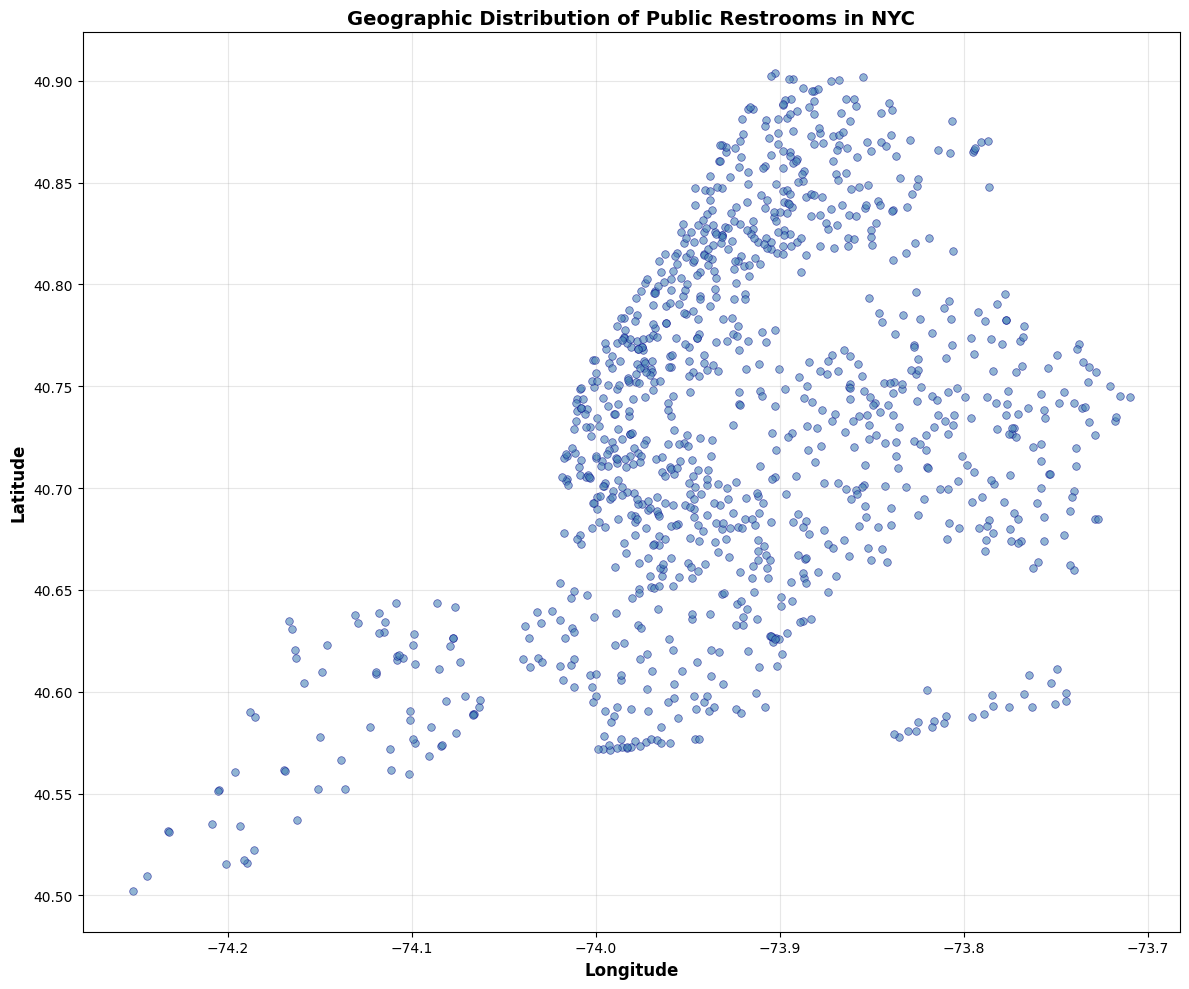

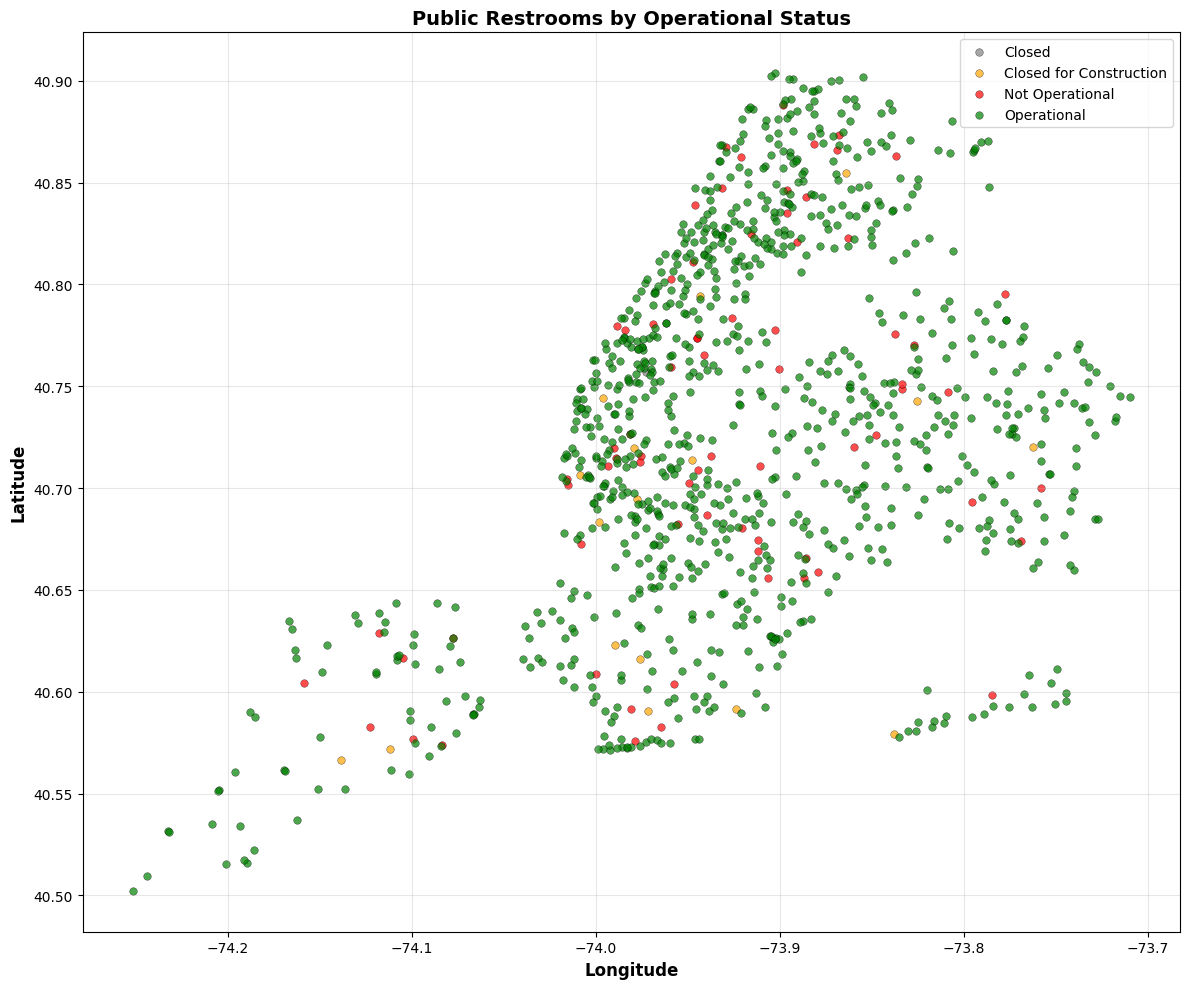

In [66]:
# Geographic analysis
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Basic statistics
    print("Geographic Coordinates Summary:")
    print("="*80)
    print("\nLatitude:")
    print(df['Latitude'].describe())
    print("\nLongitude:")
    print(df['Longitude'].describe())
    
    # Remove any rows with missing coordinates for plotting
    df_geo = df.dropna(subset=['Latitude', 'Longitude'])
    
    print(f"\nRestrooms with valid coordinates: {len(df_geo):,} ({len(df_geo)/len(df)*100:.1f}%)")
    
    # Scatter plot of locations
    fig, ax = plt.subplots(figsize=(12, 10))
    scatter = ax.scatter(df_geo['Longitude'], df_geo['Latitude'], 
                        c='steelblue', alpha=0.6, s=30, edgecolors='darkblue', linewidth=0.5)
    ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
    ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
    ax.set_title('Geographic Distribution of Public Restrooms in NYC', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # If Status column exists, color by status
    if 'Status' in df.columns:
        fig, ax = plt.subplots(figsize=(12, 10))
        statuses = df_geo['Status'].unique()
        colors_map = {'Operational': 'green', 'Not Operational': 'red', 
                     'Closed for Construction': 'orange', 'Closed': 'gray'}
        
        for status in sorted(statuses):
            mask = df_geo['Status'] == status
            color = colors_map.get(status, 'blue')
            ax.scatter(df_geo.loc[mask, 'Longitude'], df_geo.loc[mask, 'Latitude'],
                      label=status, alpha=0.7, s=30, edgecolors='black', linewidth=0.3, c=color)
        
        ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
        ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
        ax.set_title('Public Restrooms by Operational Status', fontsize=14, fontweight='bold')
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Latitude/Longitude columns not found")

## 12. Cross-Tabulation Analysis

Status by Location Type (Counts):
Status                        Closed  Closed for Construction  \
Location Type                                                   
Library                            1                       16   
Park                               0                        0   
Privately Owned Public Space       0                        1   
Public Plaza                       0                        0   
Transit                            0                        0   
All                                1                       17   

Status                        Not Operational  Operational   All  
Location Type                                                     
Library                                     0          199   216  
Park                                       73          751   824  
Privately Owned Public Space                0           13    14  
Public Plaza                                0            7     7  
Transit                                    

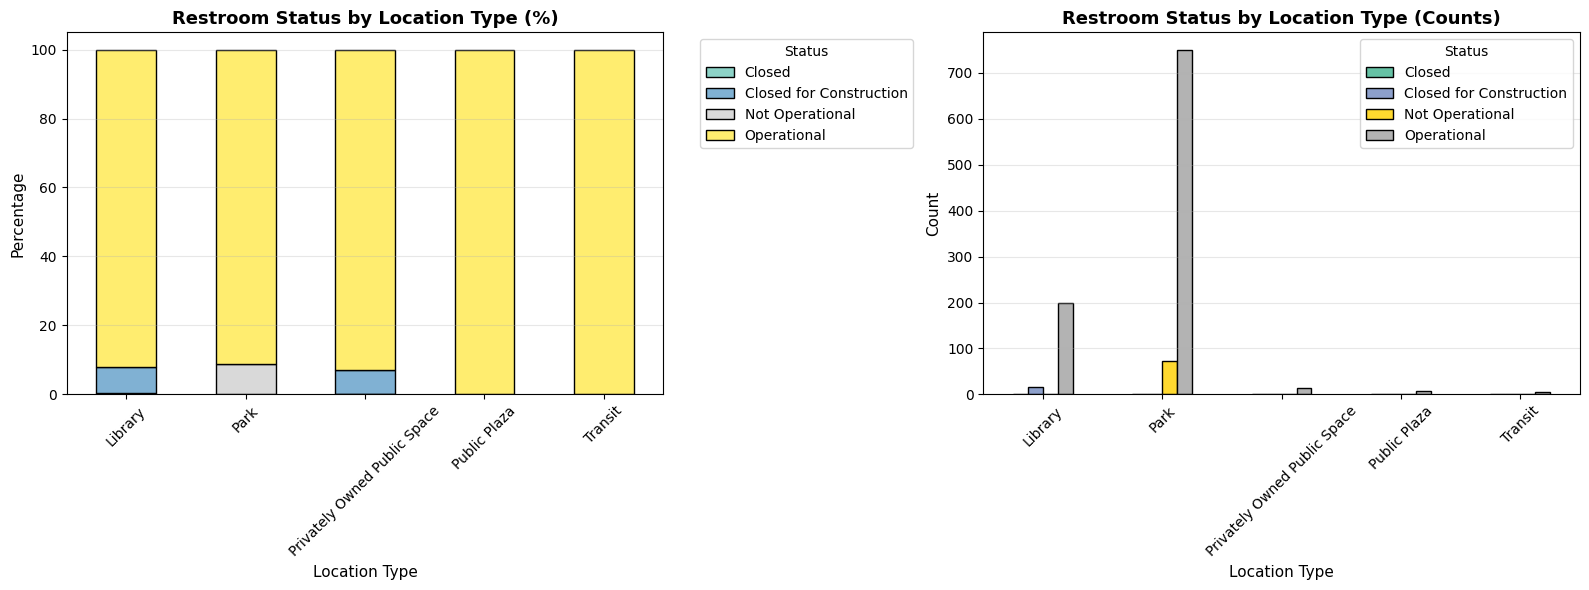

In [67]:
# Status by Location Type
if 'Status' in df.columns and 'Location Type' in df.columns:
    print("Status by Location Type (Counts):")
    print("="*80)
    crosstab = pd.crosstab(df['Location Type'], df['Status'], margins=True)
    print(crosstab)
    
    # Percentage version
    print("\n" + "="*80)
    print("Status by Location Type (Percentage):")
    print("="*80)
    crosstab_pct = pd.crosstab(df['Location Type'], df['Status'], normalize='index') * 100
    print(crosstab_pct.round(1))
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Stacked bar chart (percentage)
    crosstab_pct.plot(kind='bar', stacked=True, ax=ax1, colormap='Set3', edgecolor='black')
    ax1.set_title('Restroom Status by Location Type (%)', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Percentage', fontsize=11)
    ax1.set_xlabel('Location Type', fontsize=11)
    ax1.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    
    # Grouped bar chart (counts) - only operational vs non-operational
    crosstab_simple = pd.crosstab(df['Location Type'], df['Status'])
    crosstab_simple.plot(kind='bar', ax=ax2, colormap='Set2', edgecolor='black')
    ax2.set_title('Restroom Status by Location Type (Counts)', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Count', fontsize=11)
    ax2.set_xlabel('Location Type', fontsize=11)
    ax2.legend(title='Status', loc='best')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Status or Location Type column not found")

## 13. Hours of Operation Analysis

In [68]:
# Hours of Operation analysis
if 'Open' in df.columns:
    print("Open Schedule Distribution:")
    print("="*80)
    open_counts = df['Open'].value_counts(dropna=False)
    print(open_counts)
    print()

if 'Hours of Operation' in df.columns:
    print("\nHours of Operation (Top 20):")
    print("="*80)
    hours_counts = df['Hours of Operation'].value_counts(dropna=False).head(20)
    for i, (hours, count) in enumerate(hours_counts.items(), 1):
        pct = (count / len(df) * 100)
        hours_str = str(hours) if pd.notna(hours) else 'Not specified'
        print(f"{i:2d}. {hours_str:40s} : {count:4d} ({pct:5.1f}%)")

Open Schedule Distribution:
Open
Year Round    855
Seasonal      132
NaN            73
Future          6
Name: count, dtype: int64


Hours of Operation (Top 20):
 1. 8am-4pm, Open later seasonally           :  643 ( 60.3%)
 2. Not specified                            :   93 (  8.7%)
 3. Sunday: Closed 
Monday: 10:00 am - 6:00 pm 
Tuesday: 1:00 pm - 6:00 pm 
Wednesday: 10:00 am - 6:00 pm 
Thursday: 12:00 pm - 8:00 pm 
Friday: 10:00 am - 6:00 pm 
Saturday: 10:00 am - 5:00 pm :   51 (  4.8%)
 4. Monday	10 am - 6 pm
Tuesday	1 pm - 8 pm
Wednesday	10 am - 6 pm
Thursday	10 am - 8 pm
Friday	10 am - 6 pm
Saturday	10 am - 5 pm
Sunday	CLOSED :   44 (  4.1%)
 5. 9:00am-5:00pm                            :   13 (  1.2%)
 6. 6:00am-8:00pm Daily                      :    9 (  0.8%)
 7. Sunday: Closed 
Monday: 10:00 am - 7:00 pm 
Tuesday: 10:00 pm - 7:00 pm 
Wednesday: 10:00 am - 7:00 pm 
Thursday: 10:00 pm - 7:00 pm 
Friday: 10:00 am - 5:00 pm 
Saturday: 10:00 am - 5:00 pm :    8 (  0.8%)
 8. 24 Hours

## 14. Data Quality Summary

In [69]:
# Comprehensive data quality summary
print("="*80)
print("DATA QUALITY SUMMARY")
print("="*80)

print(f"\nDataset Overview:")
print(f"  Total Records: {len(df):,}")
print(f"  Total Columns: {len(df.columns)}")
print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Completeness
print("\nData Completeness by Column:")
completeness = ((len(df) - df.isnull().sum()) / len(df) * 100).round(2)
completeness_df = pd.DataFrame({
    'Column': df.columns,
    'Completeness_%': completeness.values,
    'Missing': df.isnull().sum().values
}).sort_values('Completeness_%')
print(completeness_df.to_string(index=False))

# Unique values
print("\n" + "="*80)
print("Unique Value Counts by Column:")
print("="*80)
for col in df.columns:
    unique_count = df[col].nunique()
    unique_pct = (unique_count / len(df) * 100)
    print(f"  {col:30s}: {unique_count:6,} ({unique_pct:5.1f}%)")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\n" + "="*80)
print(f"Duplicate Analysis:")
print(f"  Duplicate Rows: {duplicates:,}")
if duplicates > 0:
    print(f"  Duplicate Percentage: {(duplicates/len(df)*100):.2f}%")

# Key metrics
print("\n" + "="*80)
print("Key Metrics:")
print("="*80)

if 'Status' in df.columns:
    operational = (df['Status'] == 'Operational').sum()
    operational_pct = (operational / len(df) * 100).round(2)
    print(f"  Operational Restrooms: {operational:,} ({operational_pct}%)")

if 'Accessibility' in df.columns:
    accessible = df['Accessibility'].notna().sum()
    accessible_pct = (accessible / len(df) * 100).round(2)
    fully_accessible = (df['Accessibility'] == 'Fully Accessible').sum()
    print(f"  Restrooms with Accessibility Info: {accessible:,} ({accessible_pct}%)")
    print(f"  Fully Accessible: {fully_accessible:,}")

if 'Changing Stations' in df.columns:
    changing = (df['Changing Stations'] == 'Yes').sum()
    changing_pct = (changing / len(df) * 100).round(2)
    print(f"  Restrooms with Changing Stations: {changing:,} ({changing_pct}%)")

if 'Website' in df.columns:
    with_website = df['Website'].notna().sum()
    website_pct = (with_website / len(df) * 100).round(2)
    print(f"  Restrooms with Website Info: {with_website:,} ({website_pct}%)")

DATA QUALITY SUMMARY

Dataset Overview:
  Total Records: 1,066
  Total Columns: 14
  Memory Usage: 0.78 MB

Data Completeness by Column:
            Column  Completeness_%  Missing
  Additional Notes            6.66      995
           Website           21.39      838
     Accessibility           83.58      175
     Restroom Type           86.49      144
Hours of Operation           91.28       93
 Changing Stations           91.84       87
              Open           93.15       73
     Facility Name          100.00        0
     Location Type          100.00        0
          Operator          100.00        0
            Status          100.00        0
          Latitude          100.00        0
         Longitude          100.00        0
          Location          100.00        0

Unique Value Counts by Column:
  Facility Name                 :  1,040 ( 97.6%)
  Location Type                 :      5 (  0.5%)
  Operator                      :     33 (  3.1%)
  Status             

## 15. Export Summary Statistics

In [70]:
# Create summary statistics for export
summary_stats = {
    'total_records': len(df),
    'total_columns': len(df.columns),
    'duplicates': df.duplicated().sum(),
    'memory_mb': round(df.memory_usage(deep=True).sum() / 1024**2, 2)
}

if 'Status' in df.columns:
    summary_stats['operational_count'] = int((df['Status'] == 'Operational').sum())
    summary_stats['operational_pct'] = round((summary_stats['operational_count'] / len(df) * 100), 2)

if 'Location Type' in df.columns:
    summary_stats['location_types'] = int(df['Location Type'].nunique())
    summary_stats['most_common_location'] = df['Location Type'].mode()[0] if len(df['Location Type'].mode()) > 0 else None

if 'Operator' in df.columns:
    summary_stats['unique_operators'] = int(df['Operator'].nunique())
    summary_stats['top_operator'] = df['Operator'].mode()[0] if len(df['Operator'].mode()) > 0 else None

if 'Accessibility' in df.columns:
    summary_stats['fully_accessible_count'] = int((df['Accessibility'] == 'Fully Accessible').sum())

if 'Changing Stations' in df.columns:
    summary_stats['changing_stations_count'] = int((df['Changing Stations'] == 'Yes').sum())

print("Summary Statistics for Export:")
print("="*80)
for key, value in summary_stats.items():
    print(f"  {key:30s}: {value}")

# Create a DataFrame for export
summary_df = pd.DataFrame([summary_stats])
print("\n✓ Summary statistics compiled")
print("\nTo save summary to CSV, uncomment the following line:")
print("# summary_df.to_csv('../data/derived/public_restrooms_profile_summary.csv', index=False)")

Summary Statistics for Export:
  total_records                 : 1066
  total_columns                 : 14
  duplicates                    : 2
  memory_mb                     : 0.78
  operational_count             : 975
  operational_pct               : 91.46
  location_types                : 5
  most_common_location          : Park
  unique_operators              : 33
  top_operator                  : NYC Parks
  fully_accessible_count        : 619
  changing_stations_count       : 659

✓ Summary statistics compiled

To save summary to CSV, uncomment the following line:
# summary_df.to_csv('../data/derived/public_restrooms_profile_summary.csv', index=False)


## Conclusion

This notebook has provided a comprehensive profile of the public restrooms dataset, including:

1. **Data Structure**: Overview of columns, data types, and basic statistics
2. **Data Quality**: Missing data analysis and completeness metrics
3. **Categorical Analysis**: Distribution of key categorical variables
4. **Operational Insights**: Status, location types, and operators
5. **Accessibility**: Analysis of accessibility features and amenities
6. **Geographic Distribution**: Spatial patterns of restroom locations
7. **Cross-tabulations**: Relationships between different variables

Key findings can be used for further analysis, data cleaning decisions, and feature engineering.